# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [106]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure as fig

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: I think that as First PCA dimension might show up combination of Milk, Fresh and Frozen features. Here, PCA tries to maximize variance. Also, I think that ICA will show up how one type of product correlate with others by building weight vectors.

###PCA

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


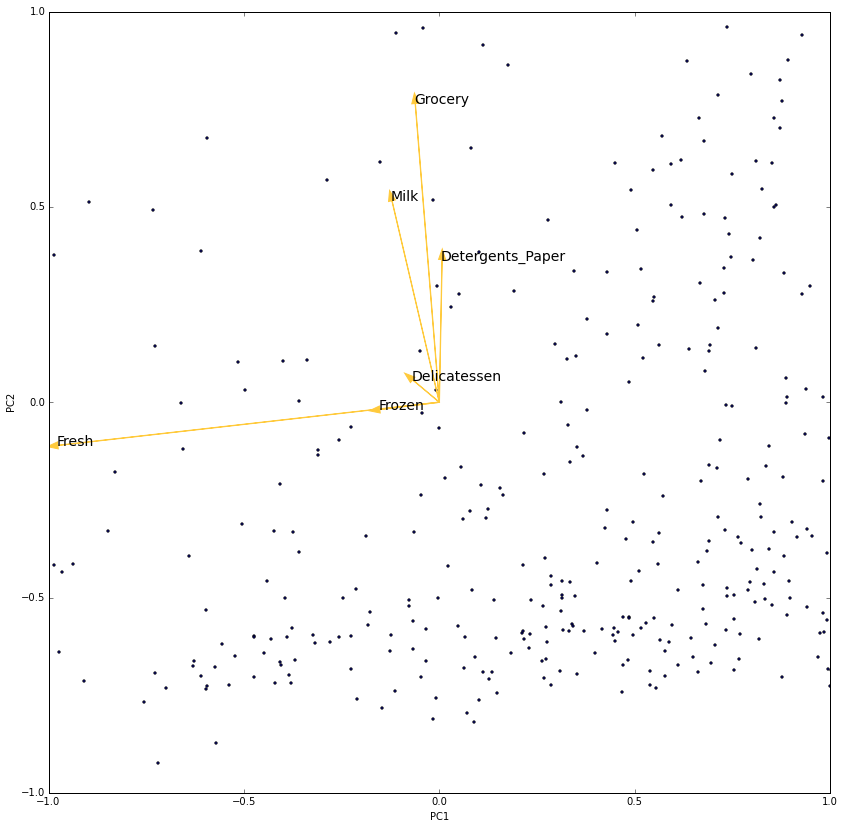

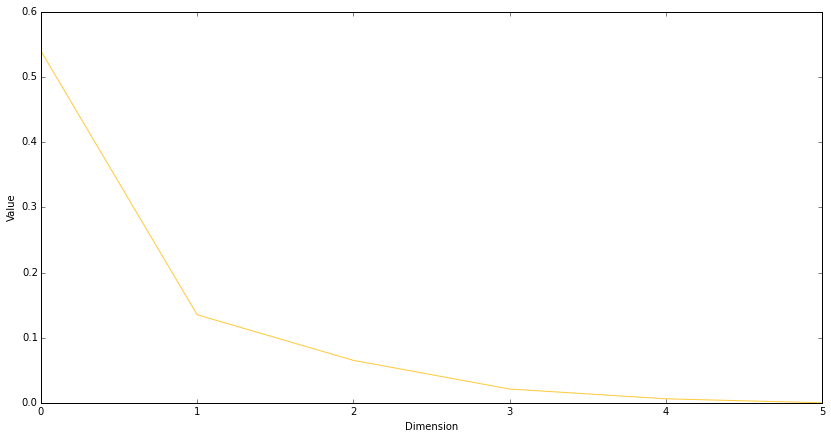

In [115]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Fit the data
def doPCA():
    pca = PCA(n_components = 6)
    pca.fit(data)
    return pca

# Print the components and the amount of variance in the data contained in each dimension
print doPCA().components_
print doPCA().explained_variance_ratio_

# Drawing Variance Plot
def visualVariance():
    x = np.arange(6)
    plt.figure(figsize=(14,7))
    plt.plot(x, 1 - np.cumsum(doPCA().explained_variance_ratio_), color="#FFCA3C")
    plt.xlabel("Dimension")    
    plt.ylabel("Value")
    
# Drawing PCA plot    
def visualPCA():
    pca = PCA(n_components = 2, whiten=True)
    pca.fit(data)
    ax = pd.DataFrame(
        pca.transform(data),
        columns=['PC1', 'PC2']
    ).plot(x='PC1', y='PC2', kind='scatter', figsize=(14,14), s=5)
    transform_data = pca.transform(data)
    for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        ax.arrow(0, 0, pc1, pc2, width=0.0009, ec='#FFCA3C', fc='#FFCA3C')
        ax.annotate(data.columns[i], (pc1, pc2), size = 14, color = 'black')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    plt.xlabel("PC1")    
    plt.ylabel("PC2")
    plt.show()
    
visualPCA()
visualVariance()

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The more dimensions we have, the more quickly variance drop off by dimension. If I were to use PCA on this dataset, I would choose 2 dimensions for my analysis because if we try to project on surface all data points, we will see that the maximum variance is reached in 2 dimensional space.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: Dimensions seem to represent combinations of the original features in data set. PCA take's the data and try to reduce it dimensionality by finding new projection of coordinate system, where it moves the x axis into principal axis variation (where it has the maximum variance) and y axis into orthogonal, less important direction of variation. So we can use this information, to reduce features in our dataset loosing minimum amount of information. Looking on given dataset, we can see, that first PCA component represents at most Fresh Food plus a little Frozen Food. Second PCA represents mixture of Detergents Paper, Grocery & Milk. 

This information can be used to make different groups of products or based on this information we can: 

    1) Open specialized shops. 
    2) Find new way of products storage organization.
    3) Make new delivery routes.
    4) Make a suggestion about how much products form each group do retailer or we need.
    5) Understand the level of demand for each type of product.

###ICA

                     ICA_1     ICA_2     ICA_3     ICA_4     ICA_5     ICA_6
Fresh            -0.003777  0.017052  0.114340 -0.007097 -0.134317 -0.016143
Milk             -0.010930 -0.001036  0.007347  0.054050 -0.002640 -0.016767
Grocery           0.050229 -0.006339 -0.005968 -0.003283  0.009861 -0.002932
Frozen           -0.001943 -0.072574  0.055173  0.001762 -0.015825  0.017060
Detergents_Paper -0.002654  0.013878 -0.061225 -0.001979  0.004100  0.004127
Delicatessen      0.004882  0.001618  0.005698  0.002532 -0.002428 -0.050964
Axes(0.125,0.125;0.775x0.775)


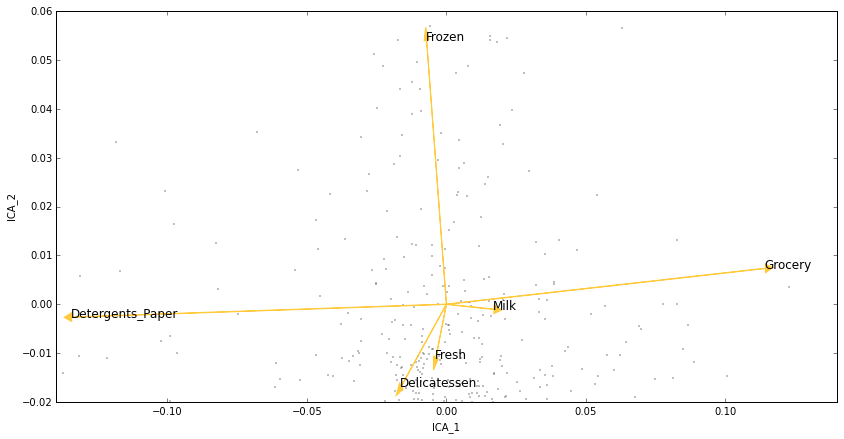

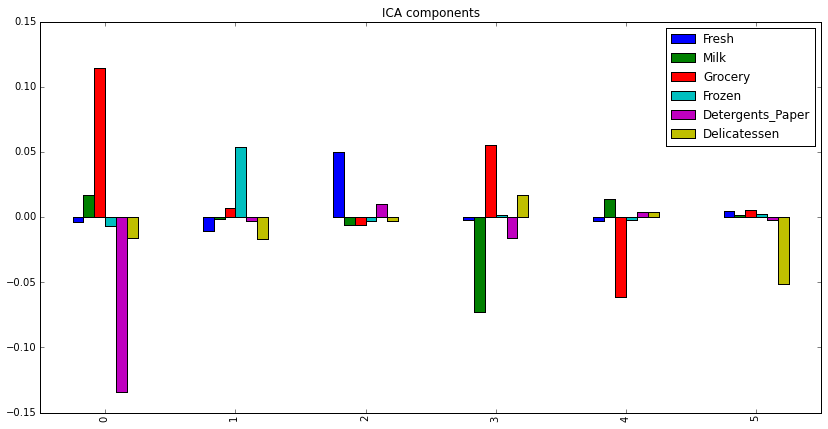

In [116]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA

# Fitting the data
ica = FastICA(random_state = 12)
ica_fit = ica.fit(data_stnd).transform(data_stnd)

# Making a plot
columns_name = ["ICA_1", "ICA_2", "ICA_3", "ICA_4", "ICA_5", "ICA_6"]

# Drawing Ica Scatter
def icaScatter():
    
    ax = pd.DataFrame(
        ica.fit(data_stnd).transform(data_stnd),
        columns=columns_name
    ).plot(x="ICA_1", y="ICA_2", kind='scatter', figsize=(14,7), s=0.1, color="white")
    
    for i, (ica_1, ica_2) in enumerate(zip(ica.components_[0], ica.components_[1])):
        ax.arrow(0, 0, ica_1, ica_2, width=0.00009, ec='#FFCA3C', fc='#FFCA3C')
        ax.annotate(data.columns[i], xy=(ica_1, ica_2),size = 12, color = 'Black')
    
    ax.set_xlim([-0.14, 0.14])
    ax.set_ylim([-0.02, 0.06]) 

icaScatter()

# Print the independent components
print pd.DataFrame(ica.components_, data.columns, columns_name)

# Making Ica Bar plot
print pd.DataFrame(ica.components_, columns = data.columns).plot(kind="bar", figsize=(14, 7), title="ICA components")

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer:We can say that absolute value of the elements of the unmixing matrix increases, the corresponding feature has a strong effect on that components. So based on a plot and matrix we can get the following groups of customers:

    1) Who buy as much grocery as few detergents_paper and average amount of another type of products. 
    2) Who buy almost frozen and average amount of another type of products.
    3) Who buy almost fresh and average amount of another type of products. 
    4) Who buy as much grocery as few milk and average amount of another type of products.
    5) Who buy average amount of all type products except Grocery.
    6) Who buy average amount of all type products except Delicatessen. 
 
This components could be represented in terms of customers as:

    1) Grocery store.
    2) Frozen food store.
    3) Fresh food store.
    4) Grocery store.
    5) Cafe or restaurants.
    6) Super market.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: Advantage of using K Means clustering are:

    1) Very simple algorithm.
    2) Reasonably fast

Disadvantages of KMC:
  
    1) You have to specify number of clusters you want to perform.
    2) It is difficult to compare quality of the clusters produced.
 
 Advantages of using Gaussian Mixture Models are:
  
    1) It is the fastest algorithm for learning mixture models.
    2) As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to          have specific structures that might or might not apply.

Disadvantages of GMM:
  
    1) When one has insufficiently many points per mixture the algorithm is known to diverge and find solutions with infinite          likelihood.
    2) This algorithm will always use all the components it has access to.
  
For this dataset, I would choose K Mean Clustering because it is simple and fast algorithm.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [117]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [118]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
#stdn_data = StandardScaler().fit_transform(data)
reduced_data = PCA(n_components=2, whiten=True).fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[-0.05066239  0.13161505]
 [ 0.34502287  0.33556674]
 [ 0.37738285  0.21406486]
 [-0.07718708 -0.5212911 ]
 [-0.83067886 -0.17928035]
 [ 0.2155776  -0.07967954]
 [ 0.05576966 -0.16710073]
 [ 0.34874672  0.11866355]
 [ 0.52313722 -0.18311407]
 [ 0.37595155  1.11903068]]


In [119]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
def SetClustersNumber(n):
    random_state=99
    clusters_ = KMeans(init='random', n_clusters=n, n_init=10, random_state=random_state).fit(reduced_data)
    return clusters_

In [120]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))
def PredictClusters(n):
    # Obtain labels for each point in mesh. Use last trained model.
    Z = SetClustersNumber(n).predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return Z

In [121]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
def SetCentroids(n):
    centroids = SetClustersNumber(n).cluster_centers_
    return centroids

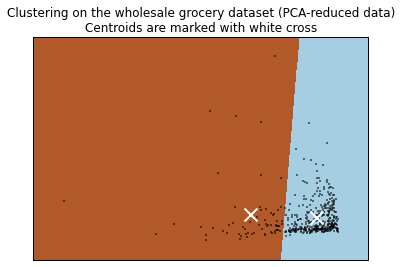

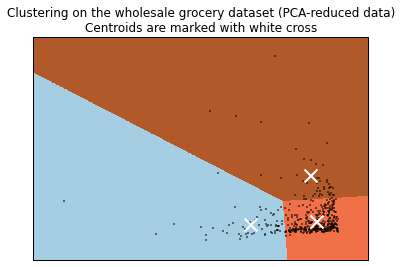

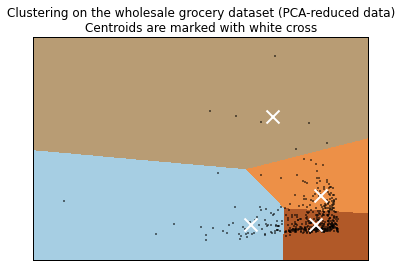

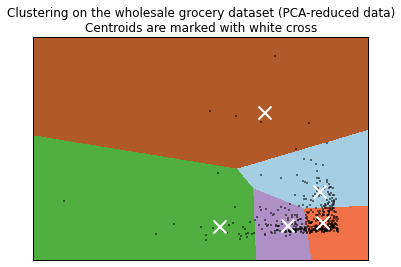

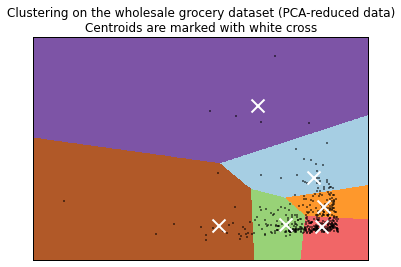

In [122]:
# Put the result into a color plot
def DrawImage(n):
    plt.figure()
    plt.clf()
    plt.imshow(PredictClusters(n), interpolation='nearest',
              extent=(xx.min(), xx.max(), yy.min(), yy.max()),
              cmap=plt.cm.Paired,
              aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(SetCentroids(n)[:, 0], SetCentroids(n)[:, 1],
                marker='x', s=169, linewidths=2,
                color='w', zorder=10)
    
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
for n in range (2,7):
    DrawImage(n)


**7)** What are the central objects in each cluster? Describe them as customers.

Answer: Central objects in each cluster are most typical representatives of each group of customers. So in each center are those customers, who buy mean amount of products in each category. It can be used to understand how much clusters do we need. For our dataset I would choose 3 clusters:
    
    1-st cluster Small run shops.
    2-nd cluster Large retailers.
    3-rd cluster Delicatessen shops.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: I feel that K-mean clustering gave me the most insight into the data. It helped me to understand, how many clusters do I need. It is very important, because based on this information I can predict customer needs. Based on this information I would choose to make 3 groups of customers:

    1) Those customers, who often buy Fresh & Frozen. (Small run shops)
    2) Those customers, who often buy Detergents_Paper, Grocery & Milk. (Large retailers)
    3) Those customers, who often buy Delicatessen. (Delicatessen shops)

**9)** How would you use that technique to help the company design new experiments?

Answer: Based on this technique, I can help the company design many new experiments. For example:
    
    1) Based on customer preferences, we can design new delivery methods(routes) by grouping different type of products.
    2) We can design new way organization of storing different groups of products.
    3) We can make a suggestion, how much products do we need from each group of products. 
    
Lets imagine we have 3 storages at 3 different places. We can store only 2 types of prducts in each storage. We have 6 types of products we need to store. We want to sell products to each customer minimizing traveling between our storages.

Using ICA we got following information:

    1) Grocery anticorrelate with Detergent Papers.
    2) Grocery anticorrelate with Milk.
    3) Frozen, Fresh, Delicatessen & Grocery are often bought separately. 

Using PCA we got following information:

    1) Group of customers who often buy Fresh & Frozen.
    2) Group of customers who often buy Grocery, Detergents_Paper & Milk.
    3) Group of customers who often buy Delicatessen.
    
Grouping information, I can offer the following way of storing products:
    
    1-st storage: Grocery with Delicatessen.
    2-nd storage: Fresh with Frozen.
    3-d storage: Milk with Detergents_Paper.
    

**10)** How would you use that data to help you predict future customer needs?

Answer: I would use PCA algorithm to reduce amount of features. It is important because we could use those cluster to build predictive models and address their specific needs, clusters can become a new variable in our predictive models.For example, after we got groups of customers we can predict whether we need to enlarge or reduce amount of stored products for each group of customers. This action can be achieved using SVM algorithm. 